# Import Libraries

In [8]:
import glob
import os
import matplotlib.image as mpimg
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn import metrics

width = 1100.0
height = 600.0

# Functions

In [24]:
def load_data(dir):
  labels = ["day","night"]  
  dataset = []
  for label in labels:
    for files in glob.glob(os.path.join(dir,label,"*")):
      image = mpimg.imread(files)
      if not image is None:
        dataset.append((image, label)) 

  return dataset
  
def standardize(image):
  
  image = cv2.resize(image, (1100, 600) )
  return image

def encode_label(label):
  if label == "day":
    return 1
  else:
    return 0

def standardize_dataset(dataset):
  standard_dataset = []
  for img , label in dataset:
    img = standardize(image= img)
    label = encode_label(label)

    standard_dataset.append((img, label))
  return standard_dataset

# Classification

In [25]:
train_dir = os.path.join("day_night_images","training")
test_dir = os.path.join("day_night_images","test")

train_dataset = load_data( train_dir )
test_dataset = load_data( test_dir )

# standardize
standardize_train_dataset = standardize_dataset(train_dataset)
standardize_test_dataset = standardize_dataset(test_dataset)



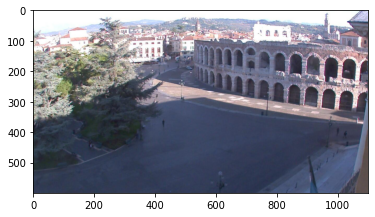

In [20]:
plt.imshow(standardize_train_dataset[0][0])

In [30]:
def cal_avg( data ):
    img = data[0]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    avg = np.sum(img[:,:,2]) / (height * width)
    return avg

def dataset_avg_cal(standardize_dataset):
    night_avgs = []
    day_avgs = []
    avgs = []
    for data in standardize_dataset:
        avg = cal_avg(data)
        if data[1] == 1: # if label is day
            day_avgs.append(avg)
        else:
            night_avgs.append(avg)
        avgs.append(avg)   
    return night_avgs,day_avgs,avgs 

night_avgs,day_avgs,avgs = dataset_avg_cal(standardize_train_dataset)
print("night mean= {}, std= {}".format(np.mean(night_avgs), np.std(night_avgs)) )
print("day mean= {}, std= {}".format(np.mean(day_avgs), np.std(day_avgs)) )


night mean= 69.17247169191918, std= 35.950774374294326
day mean= 137.3308592929293, std= 27.36090168923827


69 + 36 = 105

137-27 = 110

so lets choose 107 for threshold

In [31]:
predicted = np.where( np.array(avgs) >= 107, 1 , 0 )
labels = []
for data in  standardize_train_dataset:
    label = data[1]
    labels.append(label)
false_predicted = (np.bitwise_xor(predicted,np.array(labels)))
print("accuracy = {}".format(   (len(labels) - np.sum(false_predicted)) 
                                / len(labels) ))


accuracy = 0.875


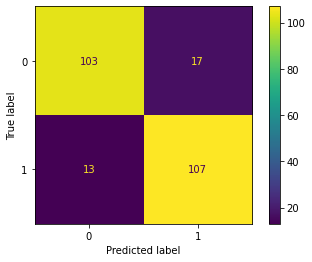

In [28]:

confusion_matrix = metrics.confusion_matrix(np.array(labels), predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# Test 

accuracy = 0.9


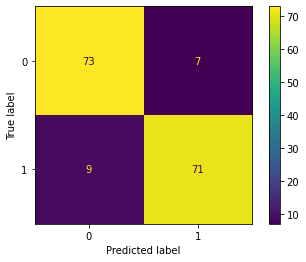

In [33]:
night_avgs,day_avgs,avgs = dataset_avg_cal(standardize_test_dataset)
predicted = np.where( np.array(avgs) >= 107, 1 , 0 )
labels = []
for data in  standardize_test_dataset:
    label = data[1]
    labels.append(label)
false_predicted = (np.bitwise_xor(predicted,np.array(labels)))
print("accuracy = {}".format(   (len(labels) - np.sum(false_predicted)) 
                                / len(labels) ))
confusion_matrix = metrics.confusion_matrix(np.array(labels), predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()